# **Machine Learning from Data**

## Lab 5: Crossvalidation

2022 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

2023 - David Remondo - BAMPLA-ENTEL

-----------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, ShuffleSplit

import sklearn.preprocessing as skl_pre
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn.utils import shuffle

##Part1: Cross validation in $k$-NN for hyperparameter choice

In this exercise, we will consider the data set `data/biopsy.csv` with data from breast biopsies, for the purpose of diagnosing breast cancer. For each patient, the data set contains nine different attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses) scored on a scale from $1$ to $10$, as well as the physician’s diagnosis (malign or benign).

We will try to determine suitable value of $k$ in $k$-NN for this data. For simplicity, we will only consider the three attributes in columns `V3`, `V4`and `V5` in this problem.

## Biopsy Dataset
This data frame `biopsy` contains the following columns:  
`ID`: sample code number (not unique).  
`V1`: clump thickness.  
`V2`: uniformity of cell size.  
`V3`: uniformity of cell shape.  
`V4`: marginal adhesion.  
`V5`: single epithelial cell size.  
`V6`: bare nuclei (16 values are missing).  
`V7`: bland chromatin.  
`V8`: normal nucleoli.  
`V9`: mitoses.  
`class`: "benign" or "malignant".

### Data loading
Load and familiarize yourself with the data set, using, e.g.`info()`, `describe()`, `pandas.plotting.scatter_matrix()` and `print()`.

In [ ]:
# url = 'data/biopsy.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
biopsy = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()



For simplicity, we will only consider the three attributes in columns `V3`, `V4`and `V5` in this problem. Print the scatter plots relative to these variables. Explain what we can conclude from the resulting plots.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   683 non-null    int64  
 1   ID      683 non-null    object 
 2   V1      683 non-null    int64  
 3   V2      683 non-null    int64  
 4   V3      683 non-null    int64  
 5   V4      683 non-null    int64  
 6   V5      683 non-null    int64  
 7   V6      683 non-null    float64
 8   V7      683 non-null    int64  
 9   V8      683 non-null    int64  
 10  V9      683 non-null    int64  
 11  class   683 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 64.2+ KB


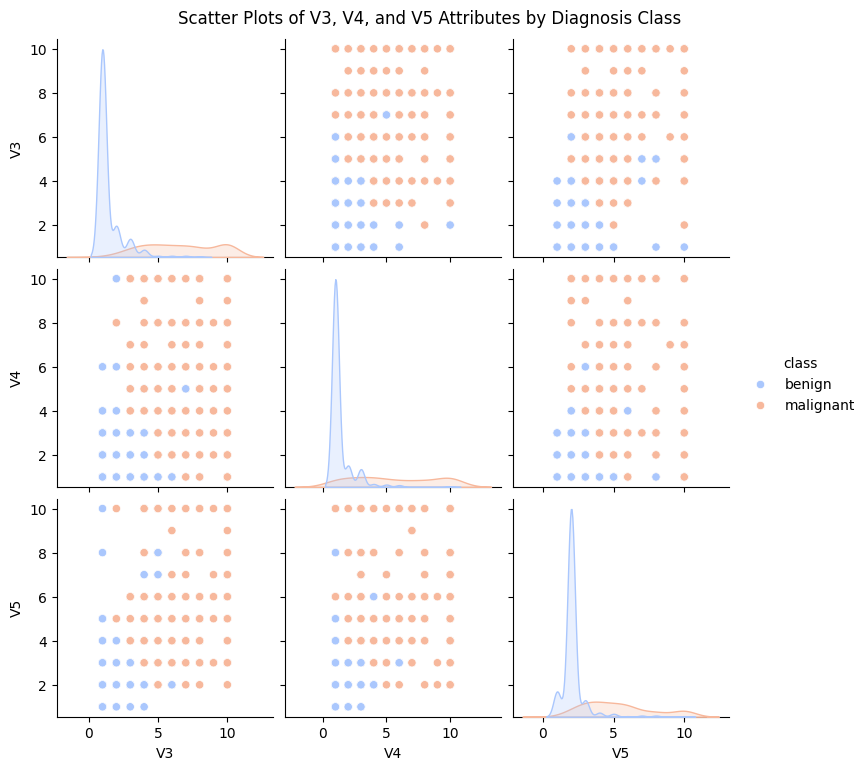

In [ ]:
# Define features (X) and target (y)
X = biopsy[['V3', 'V4', 'V5']]
y = biopsy['class']

# Display basic info and description of the data
biopsy.info()
biopsy.describe()

biopsy_subset = biopsy[['V3', 'V4', 'V5', 'class']]
sns.pairplot(biopsy_subset, hue='class', palette='coolwarm')
plt.suptitle("Scatter Plots of V3, V4, and V5 Attributes by Diagnosis Class", y=1.02)
plt.show()

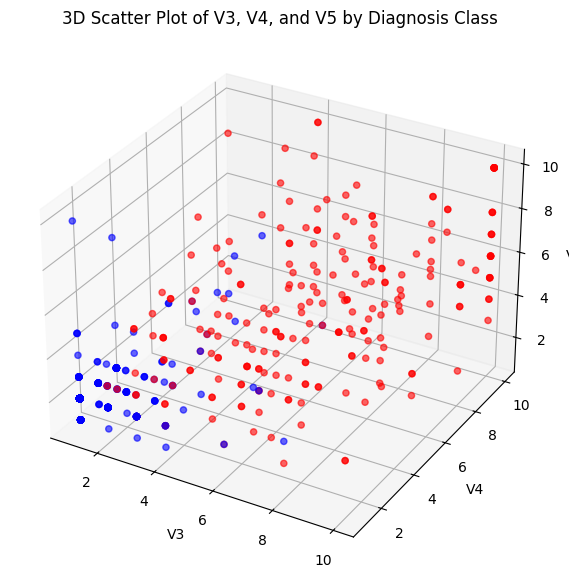

In [ ]:
# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = biopsy_subset['class'].map({'benign': 'blue', 'malignant': 'red'})
ax.scatter(biopsy_subset['V3'], biopsy_subset['V4'], biopsy_subset['V5'], c=colors, alpha=0.6)

# Setting axis labels
ax.set_xlabel('V3')
ax.set_ylabel('V4')
ax.set_zlabel('V5')
ax.set_title('3D Scatter Plot of V3, V4, and V5 by Diagnosis Class')

# Show the plot
plt.show()


**From the scatter plot matrix, we can observe that features V3 and V4 appear to have better class-separation. V3 and V4 are better at separating benign and malignant classes as the malignant cases usually have higher values. V5 shows more overlap making it less useful. Overall combining the features and observing as 3D we can say that there is a good enough seperation and boundary between 2 classes which will give a good accuracy with KNN**

### All data as training data
In this section, we will consider all data as training data. Investigate how the training error varies with different values of the number of neighbours hyperparameter $k$ (hint: use a `for`-loop). Which value of $k$ gives the best result? Is it a good choice of $k$?

With the smallest k values, especially k=1,
, training error is lowest because the model closely fits the data. However, this leads to overfitting, so k=1 isn't a good choice. A slightly larger k would better balance error and generalization.




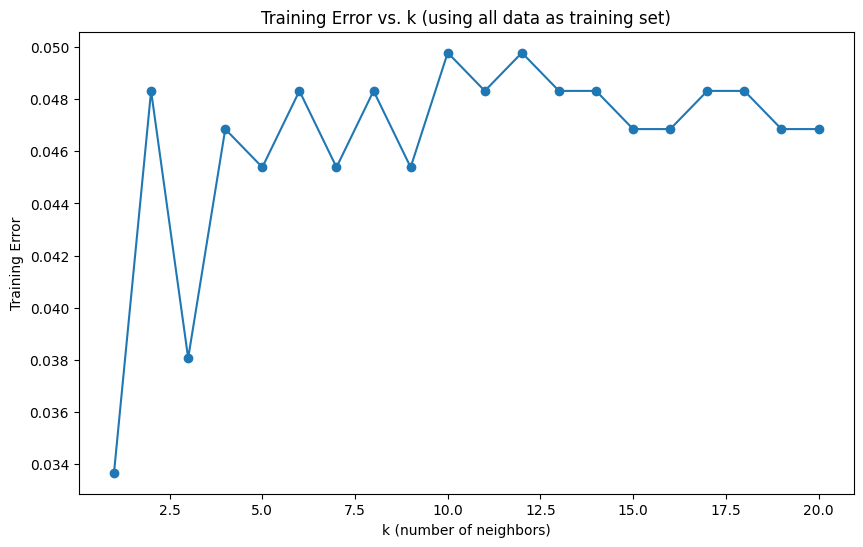

In [ ]:
train_errors = []
k_values = range(1, 21)  # k values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    train_accuracy = knn.score(X, y)
    train_errors.append(1 - train_accuracy)

# Plot training error vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Training Error')
plt.title('Training Error vs. k (using all data as training set)')
plt.show()


###Random permutations cross-validation a.k.a. Shuffle & Split
Repeat the previous exercise 10 times for different, randomly chosen train and validation sets and average the results.




Alternatively, we can also use the ´ShuffleSplit´ iterator.

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets. It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

Which $k$ gives the best result?

Compare the curve with the ones obtained in the previous section.



ShuffleSplit cross-validation shows that certain
k values (around 10-15) yield the lowest average validation error, indicating better generalization.

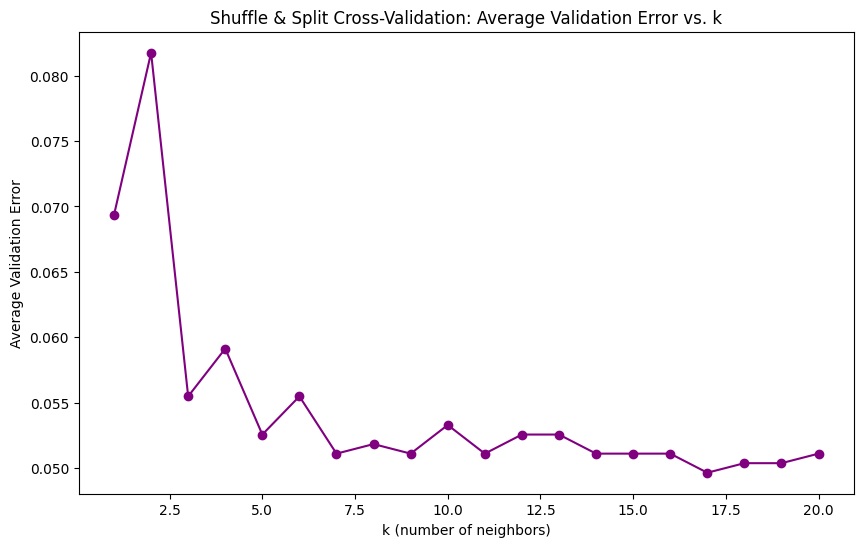

In [ ]:
# Use ShuffleSplit for cross-validation with 10 splits
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
average_val_errors = np.zeros(len(k_values))

for train_idx, val_idx in shuffle_split.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    fold_val_errors = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        val_accuracy = knn.score(X_val, y_val)
        fold_val_errors.append(1 - val_accuracy)

    # Accumulate errors from this split without dividing
    average_val_errors += np.array(fold_val_errors)

# divide by the number of splits to get the average
average_val_errors /= shuffle_split.n_splits

# Plot average validation error for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_val_errors, marker='o', color='purple')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Average Validation Error')
plt.title('Shuffle & Split Cross-Validation: Average Validation Error vs. k')
plt.show()


### Kfold cross-validation
Now we will perform 10-fold cross-validation. First, we will randomly permute the data set, divide the data set into 10 equally sized parts and loop through them by taking one part as validation set and the rest as training set each time, and average the result over the 10 runs. Which $k$ gives the best result?

In [ ]:
# Features and target
X = biopsy_subset[['V3', 'V4', 'V5']].values
y = biopsy_subset['class'].values

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Range of k values to test
k_values = range(1, 15)
average_accuracies = []

# Loop over different values of k
for k in k_values:
    accuracies = []

    # Perform 10-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize k-NN with current k
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train on the training set
        knn.fit(X_train, y_train)

        # Evaluate on the validation set
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    average_accuracies.append(avg_accuracy)
    print(f"Average accuracy for k={k}: {avg_accuracy:.4f}")


# Determine the best k based on highest average accuracy
best_k = k_values[np.argmax(average_accuracies)]
best_accuracy = max(average_accuracies)

print(f"The best k is {best_k} with an average accuracy of {best_accuracy:.4f}")


Average accuracy for k=1: 0.9136
Average accuracy for k=2: 0.9092
Average accuracy for k=3: 0.9458
Average accuracy for k=4: 0.9429
Average accuracy for k=5: 0.9531
Average accuracy for k=6: 0.9472
Average accuracy for k=7: 0.9487
Average accuracy for k=8: 0.9502
Average accuracy for k=9: 0.9502
Average accuracy for k=10: 0.9516
Average accuracy for k=11: 0.9502
Average accuracy for k=12: 0.9516
Average accuracy for k=13: 0.9487
Average accuracy for k=14: 0.9517
The best k is 5 with an average accuracy of 0.9531


**k = 5 gives the best result with an average accuracy of 0.9531**

### Using GridSearchCV

In this section, we will do the same as above but using GridSearchCV. We will use ShuffleSplit and KFold strategies.

Apply ShuffleSplit first, with 5 repetitions, and show how the training and validation errors vary with the value of $k$.

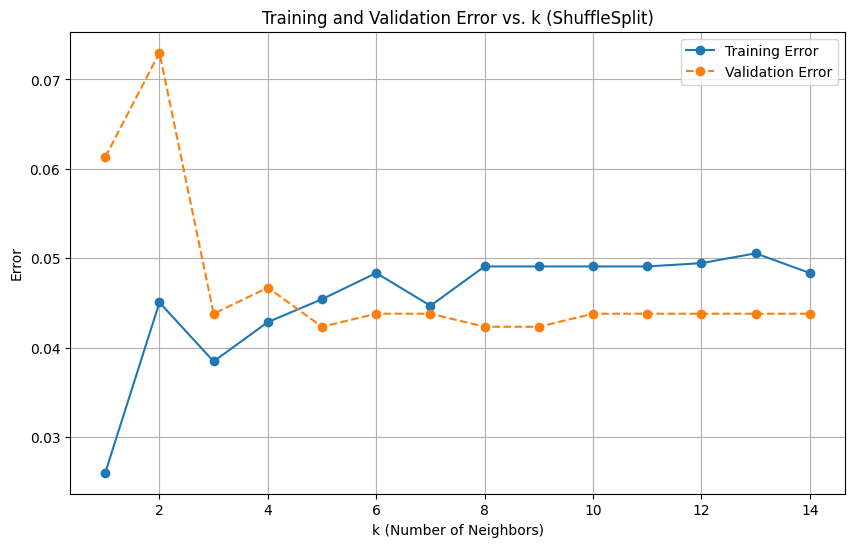

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 15)

# Initialize ShuffleSplit with 5 repetitions
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

# Containers to store training and validation errors
train_errors = []
validation_errors = []

# Loop over different k values
for k in k_values:
    train_scores = []
    validation_scores = []

    # Use ShuffleSplit for splitting
    for train_index, validation_index in shuffle_split.split(X):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]

        # Initialize k-NN with current k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Training accuracy
        train_scores.append(knn.score(X_train, y_train))

        # Validation accuracy
        validation_scores.append(knn.score(X_validation, y_validation))

    # Calculate average training and validation error for current k
    train_errors.append(1 - np.mean(train_scores))  # Error = 1 - accuracy
    validation_errors.append(1 - np.mean(validation_scores))

# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o', linestyle='-')
plt.plot(k_values, validation_errors, label='Validation Error', marker='o', linestyle='--')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. k (ShuffleSplit)')
plt.legend()
plt.grid()
plt.show()


**Starting from k = 1 the training error is very low which increases as we increase the value of K. On the other hand the error on the validation set is higher  (close to 0.93) when k=1 but decreases with higher values of k. After the shuffle split and using K-fold strategy we get the optimum value of k to be 5.**

Now use K-Fold with $k=5$ (note that here the variable $k$ we refer to is not the number of nearest neighbours, but the number of splits in the K-Fold validation method).

Show what is the difference between the results obtained with ShuffleSplit with n-splits=5 and with 5-Fold cross validation.

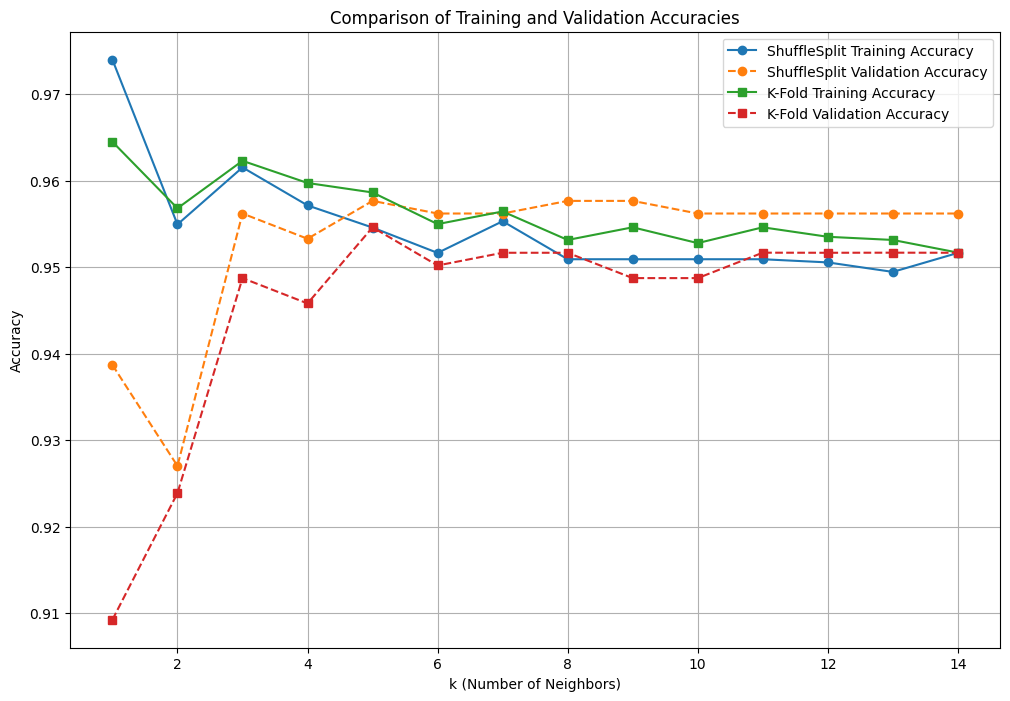

In [ ]:
k_values = range(1, 15)

# Containers for ShuffleSplit results
shuffle_train_accuracies = []
shuffle_validation_accuracies = []

# Containers for K-Fold results
kfold_train_accuracies = []
kfold_validation_accuracies = []

# ShuffleSplit Strategy
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

for k in k_values:
    shuffle_train_scores = []
    shuffle_validation_scores = []

    for train_index, validation_index in shuffle_split.split(X):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]

        # Train k-NN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Training and validation scores
        shuffle_train_scores.append(knn.score(X_train, y_train))
        shuffle_validation_scores.append(knn.score(X_validation, y_validation))

    # Append average accuracies for ShuffleSplit
    shuffle_train_accuracies.append(np.mean(shuffle_train_scores))
    shuffle_validation_accuracies.append(np.mean(shuffle_validation_scores))

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for k in k_values:
    kfold_train_scores = []
    kfold_validation_scores = []

    for train_index, validation_index in kfold.split(X):
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]

        # Train k-NN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        kfold_train_scores.append(knn.score(X_train, y_train))
        kfold_validation_scores.append(knn.score(X_validation, y_validation))

    # Append average accuracies for K-Fold
    kfold_train_accuracies.append(np.mean(kfold_train_scores))
    kfold_validation_accuracies.append(np.mean(kfold_validation_scores))

# Plotting comparison
plt.figure(figsize=(12, 8))

# ShuffleSplit
plt.plot(k_values, shuffle_train_accuracies, label='ShuffleSplit Training Accuracy', marker='o', linestyle='-')
plt.plot(k_values, shuffle_validation_accuracies, label='ShuffleSplit Validation Accuracy', marker='o', linestyle='--')

# K-Fold
plt.plot(k_values, kfold_train_accuracies, label='K-Fold Training Accuracy', marker='s', linestyle='-')
plt.plot(k_values, kfold_validation_accuracies, label='K-Fold Validation Accuracy', marker='s', linestyle='--')

plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracies')
plt.legend()
plt.grid()
plt.show()


**With both 5-fold split and Shuffle split with 5 repititions, we get the optimum value of k to be 5 at which we see the most accuracy and least error. However the validation accuracy is better when using the shuffle split for training and validation compared to K-fold. In ourcase with 5-NN we get the accuracy of 0.957 when using ShuffleSplit and accuracy of 0.954 with k-fold.**

**We also observe that as we keep increasing the value of k (Number of nearest neighbours) the accuracy remains the same more or less**

##Part2: Cross validation for model choice

In this problem we will consider the data sets `pima_tr.csv` and `pima_te.csv`. Your task is to do as good prediction as possible for the test set `pima_te`, but you are only allowed to look at the true output in `pima_te` once. Hence, you will have to use `pima_tr` for both deciding which model to use and training the model.

The data set describes the prevalence of diabetes in women at least 21 years old of Pima Indian heritage, living near Phoenix, Arizona, USA. The data set describes, for each individual, whether she has diabetes or not, her age, the diabetes pedigree function (a summary of the diabetes history in her family), BMI, skin thickness, blood pressure, plasma glucose concentration and number of pregnancies.

The data frame contains the following columns:  
`npreg` number of pregnancies.  
`glu` plasma glucose concentration in an oral glucose tolerance test.  
`bp` diastolic blood pressure (mm Hg).  
`skin` triceps skin fold thickness (mm).  
`bmi` body mass index (weight in kg/(height in m)\^2).  
`ped` diabetes pedigree function.  
`age` age in years.  
`type` Yes or No, for diabetic according to WHO criteria.

###1. Dataset
Load the dataset and familiarize with it

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/MLEARN_Labs/Lab5/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('pima_tr.csv')
test = pd.read_csv('pima_te.csv')

In [ ]:
train.head()

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


In [ ]:
train.shape, test.shape

((200, 8), (332, 8))

In [ ]:
print("Missing Values")
print(train.isnull().sum())
print(test.isnull().sum())

Missing Values
npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64
npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64


type
No     132
Yes     68
Name: count, dtype: int64


<ipython-input-8-d946291c4ef6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=train, palette='viridis')


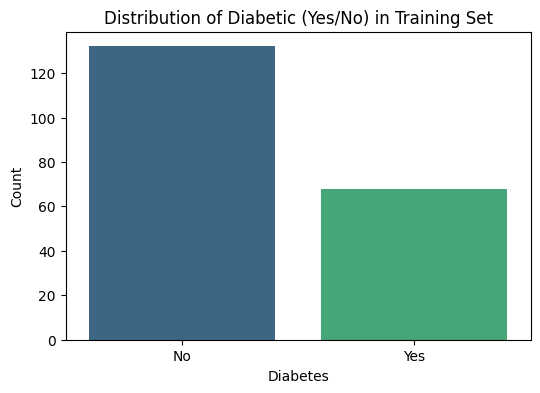

In [ ]:
print(train['type'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=train, palette='viridis')
plt.title('Distribution of Diabetic (Yes/No) in Training Set')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [ ]:
print(train.dtypes)

npreg      int64
glu        int64
bp         int64
skin       int64
bmi      float64
ped      float64
age        int64
type      object
dtype: object


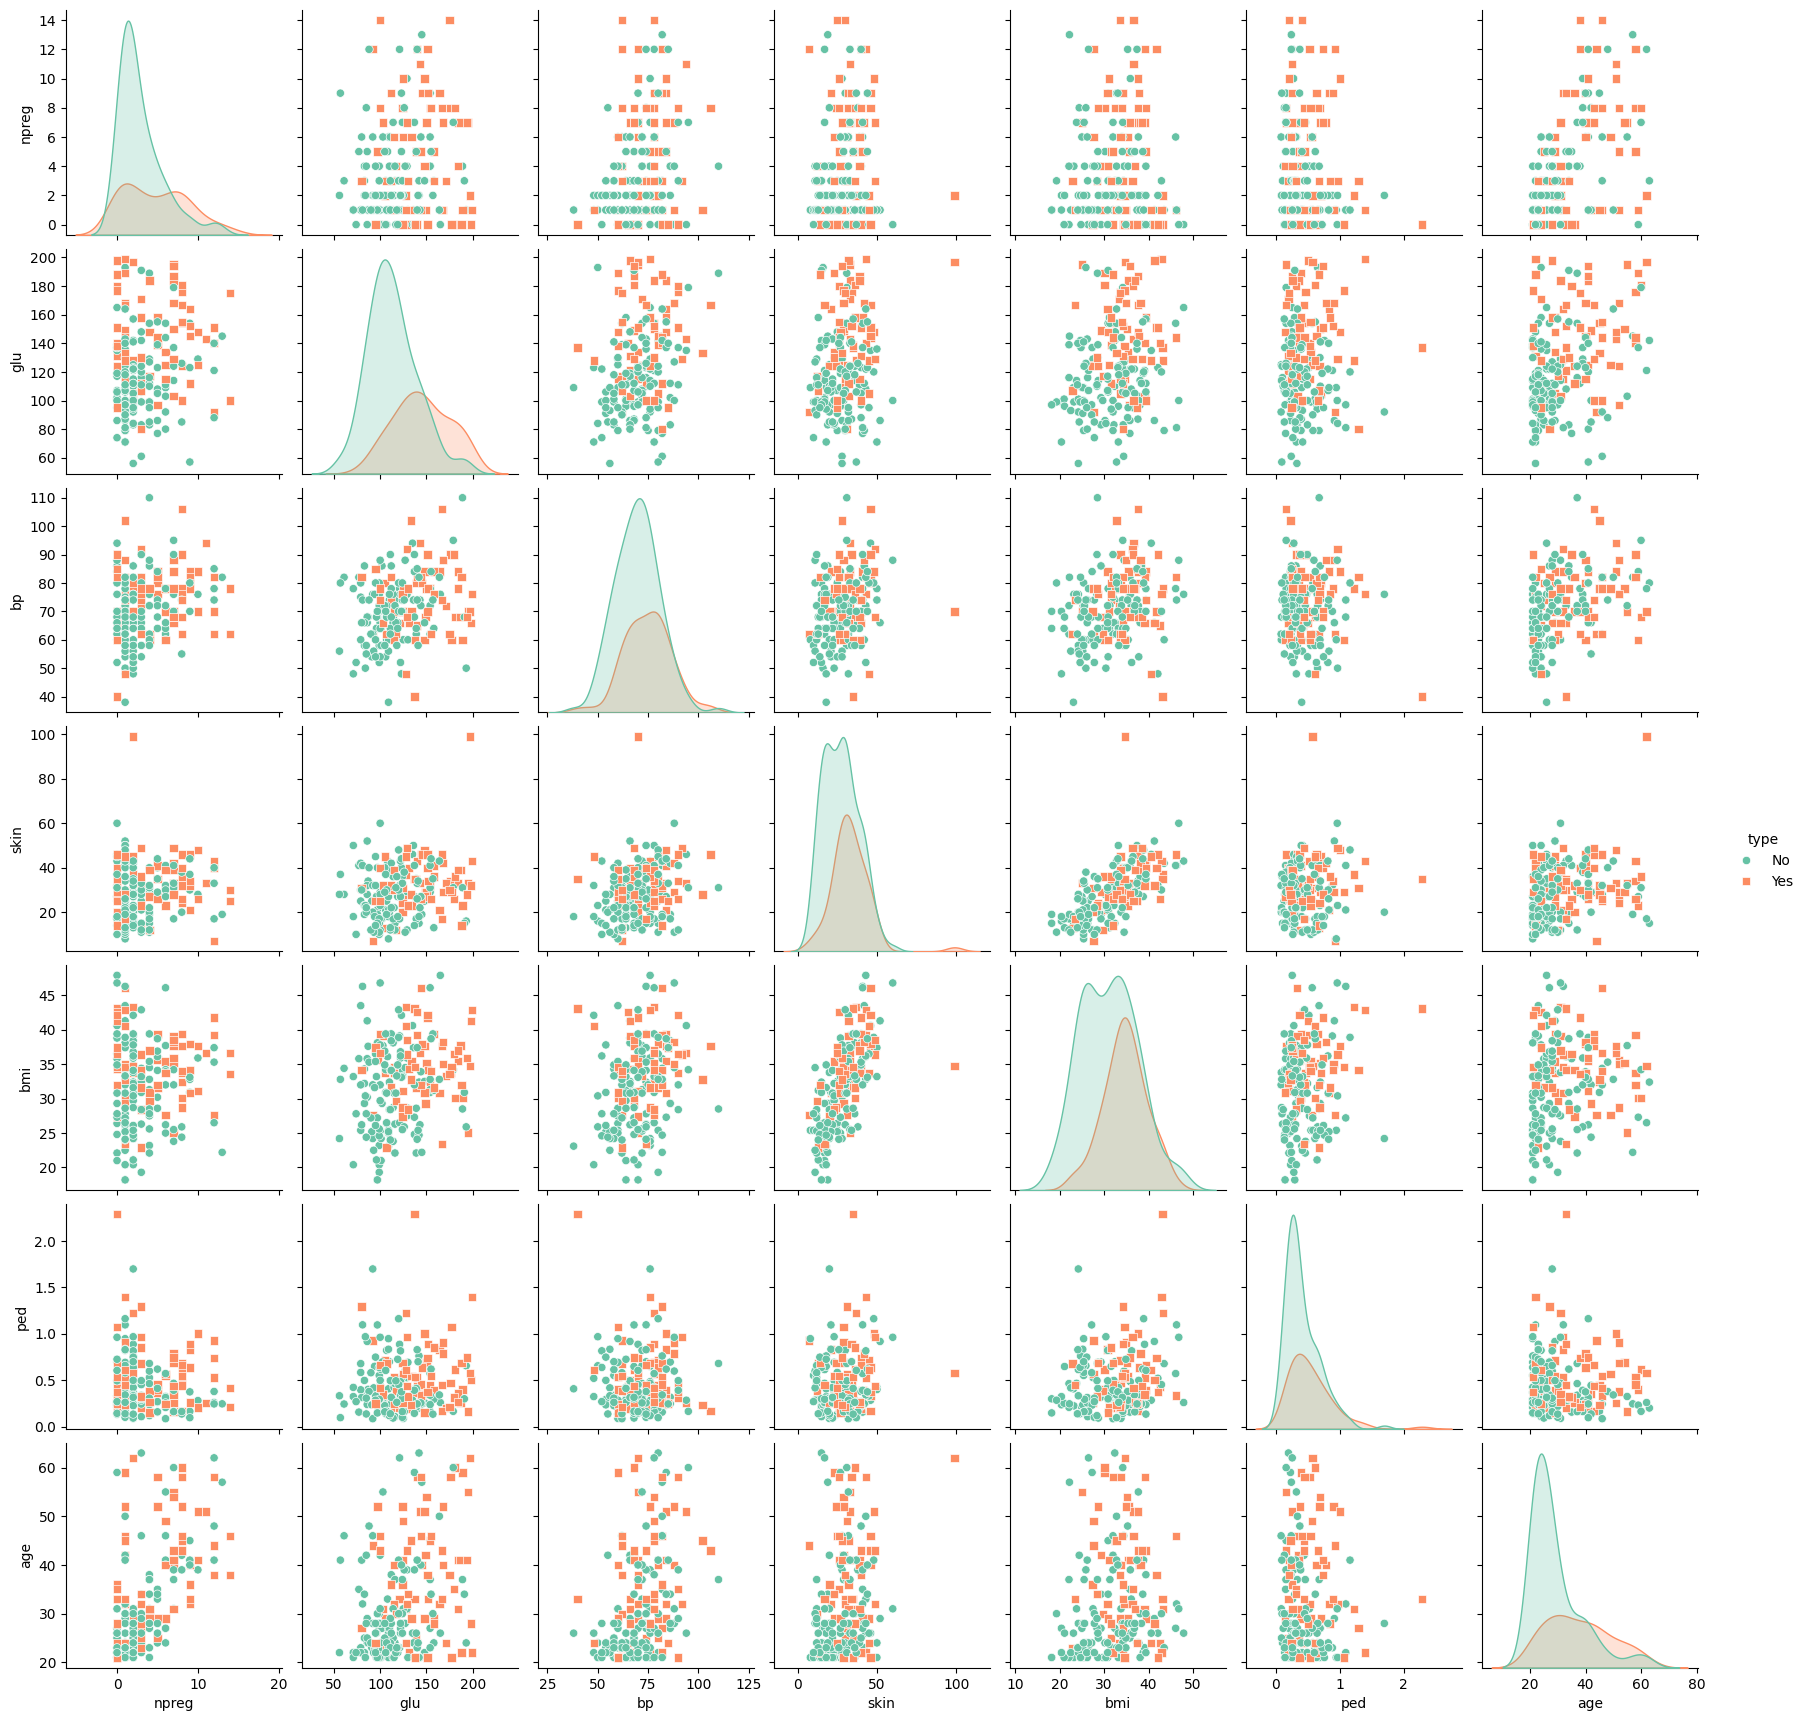

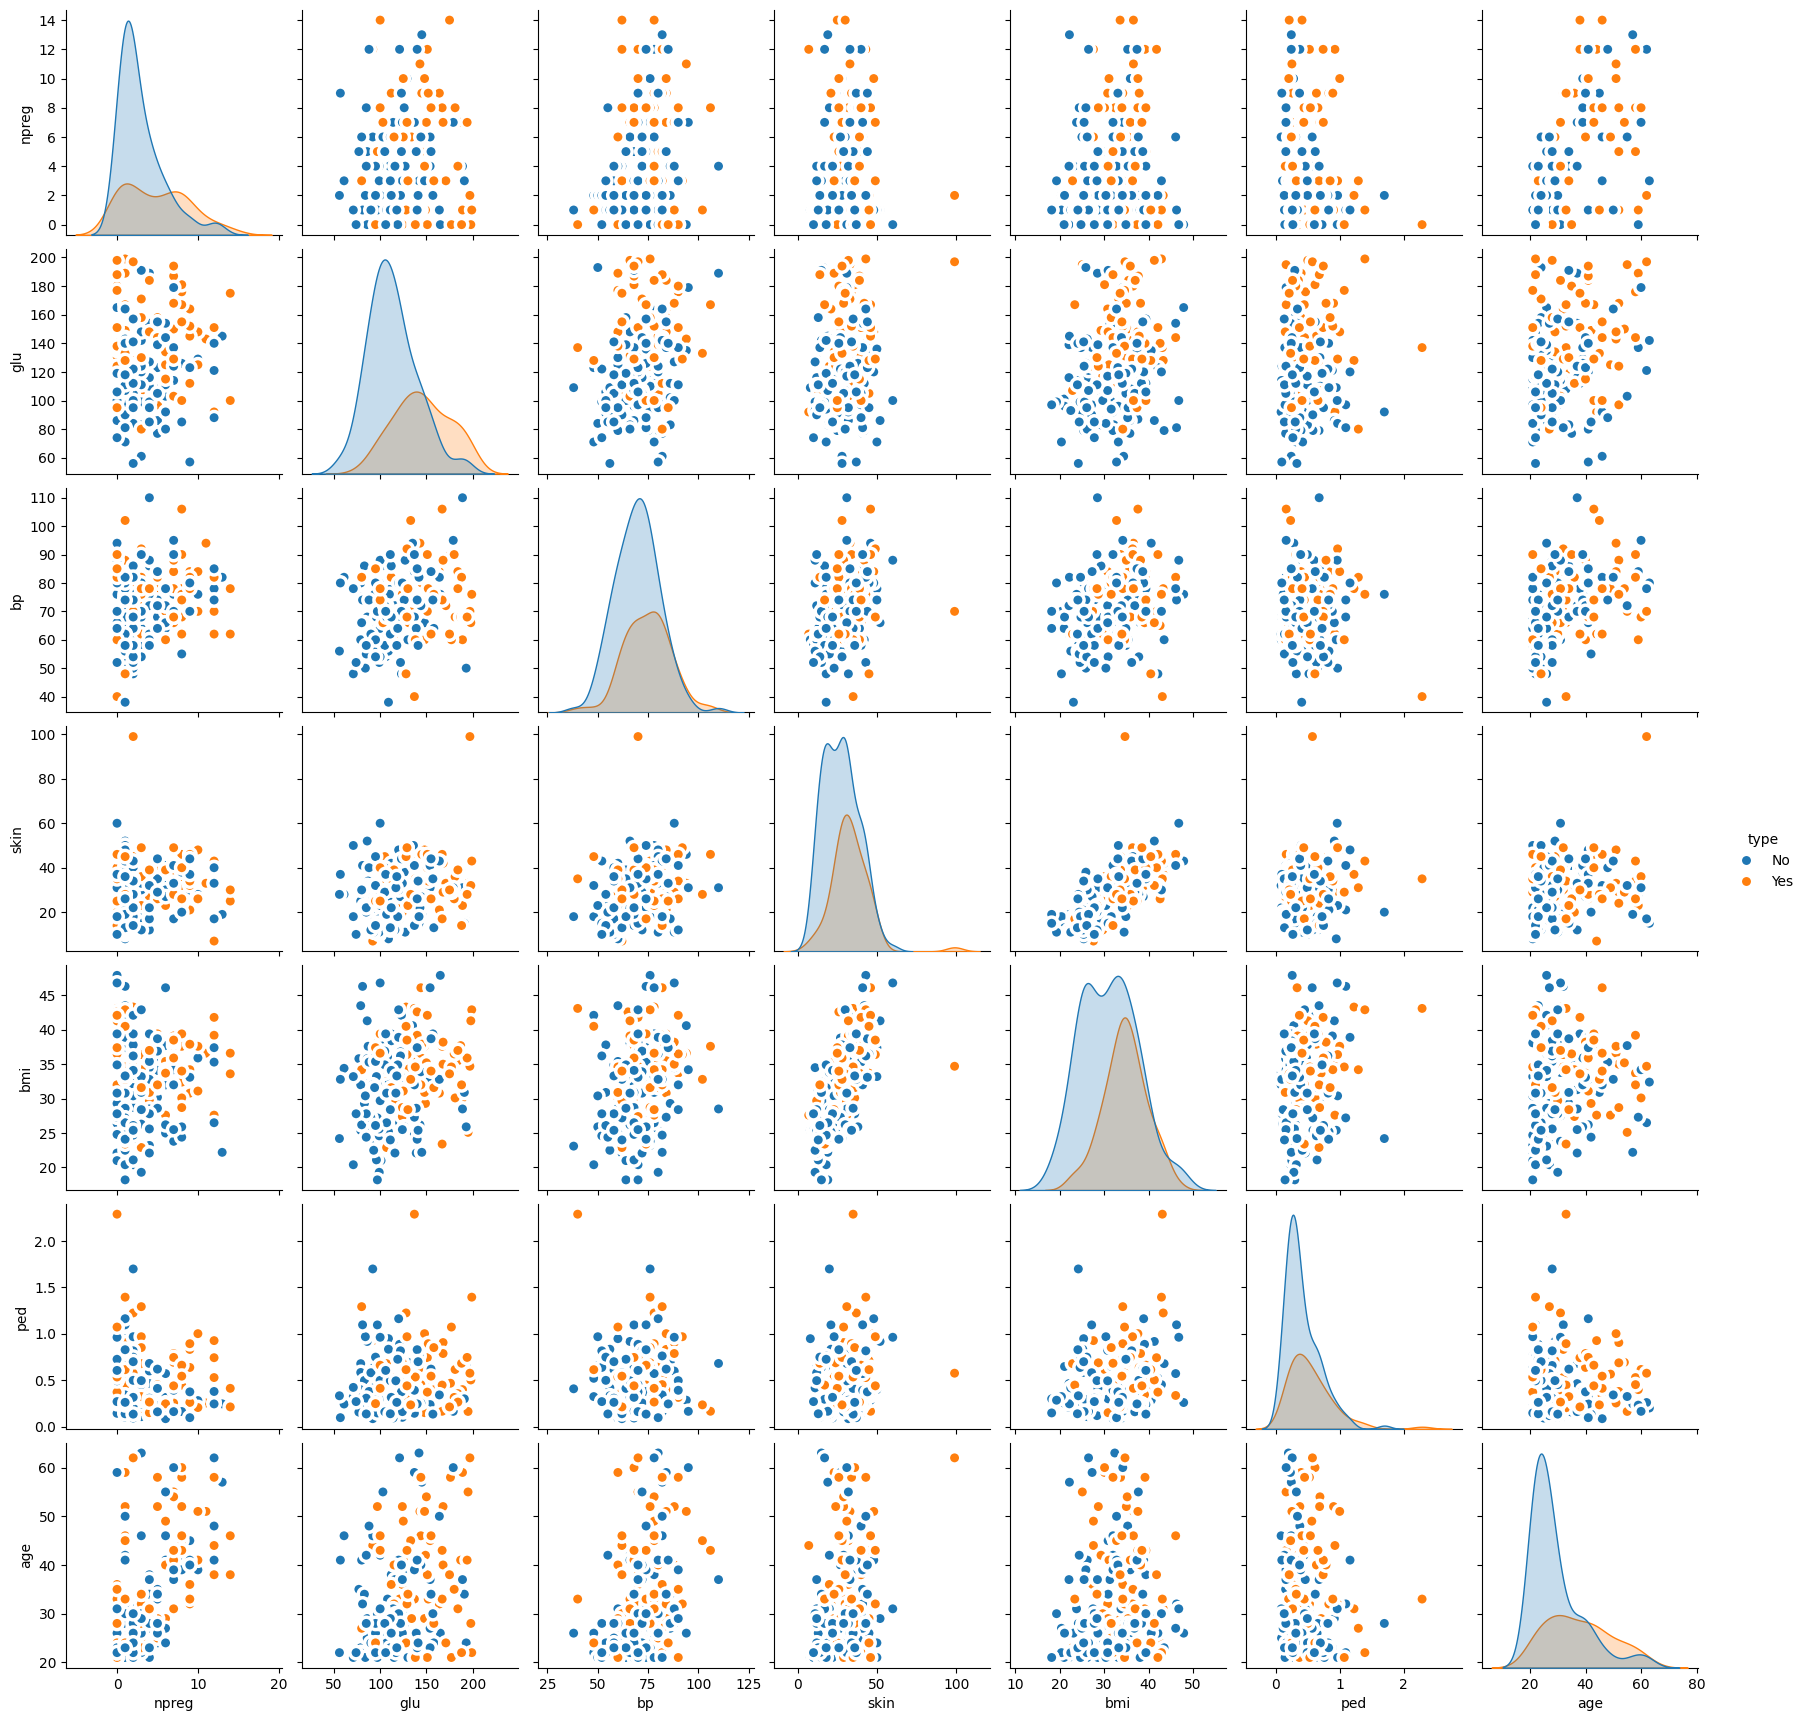

In [ ]:
sns.pairplot(train, kind="scatter", hue="type", markers=["o", "s"], palette="Set2")
plt.show()

# right: you can give other arguments with plot_kws.
sns.pairplot(train, kind="scatter", hue="type", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### 2. Fitting models
In the next two sub-sections, you will show how well you can fit the `pima_tr` using LDA, QDA and k-NN (k = 2). The output is whether an individual has diabetes or not, and the input the remaining variables.

###2.1. Use the whole training set to train and evaluate the models.

What error rate does each method have?

Answer:

LDA Error: 0.20

QDA Error: 0.23

KNN Error: 0.28

Is it a good indicator of which method is preferable?

Answer:

From only checking the accuracy, LDA is preferable. When we see the confusion matrices and the classification reports of all the classifiers, we can confirm that it is preferable to use LDA for this dataset when we are using all the datapoints.

In [ ]:
X_train = train.drop(columns=['type'])
y_train = train['type']
X_test = test.drop(columns=['type'])
y_test = test['type']

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
#models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
X_train.shape, y_train_encoded.shape, X_test.shape, y_test_encoded.shape

((200, 7), (200,), (332, 7), (332,))

In [ ]:
# Fit and evaluate LDA model
lda.fit(X_train, y_train_encoded)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test_encoded, y_pred_lda)
print("LDA Model Performance:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Error: {1-accuracy_lda: .2f}")
print(confusion_matrix(y_test_encoded, y_pred_lda))
print(classification_report(y_test_encoded, y_pred_lda))

# Fit and evaluate QDA model
qda.fit(X_train, y_train_encoded)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test_encoded, y_pred_qda)
print("\nQDA Model Performance:")
print(f"Accuracy: {accuracy_qda:.2f}")
print(f"Error: {1-accuracy_qda: .2f}")
print(confusion_matrix(y_test_encoded, y_pred_qda))
print(classification_report(y_test_encoded, y_pred_qda))

# Fit and evaluate k-NN (k=2) model
knn.fit(X_train, y_train_encoded)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print("\nk-NN (k=2) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Error: {1-accuracy_knn: .2f}")
print(confusion_matrix(y_test_encoded, y_pred_knn))
print(classification_report(y_test_encoded, y_pred_knn))

LDA Model Performance:
Accuracy: 0.80
Error:  0.20
[[198  25]
 [ 42  67]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       223
           1       0.73      0.61      0.67       109

    accuracy                           0.80       332
   macro avg       0.78      0.75      0.76       332
weighted avg       0.79      0.80      0.79       332


QDA Model Performance:
Accuracy: 0.77
Error:  0.23
[[194  29]
 [ 47  62]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       223
           1       0.68      0.57      0.62       109

    accuracy                           0.77       332
   macro avg       0.74      0.72      0.73       332
weighted avg       0.76      0.77      0.77       332


k-NN (k=2) Model Performance:
Accuracy: 0.72
Error:  0.28
[[207  16]
 [ 77  32]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       223
      

### 2.2. 10-fold cross validation

Now perform 10-fold cross-validation by first randomly permute `pima_tr` and divide it in 10 parts. Then, in a loop with one of the 10 parts held out as validation data, fit LDA, QDA and k-NN (k = 2) to the training data and evaluate the performance on the validation data. Plot your results in a box plot with the error rates. Feel free to play around with the choice of inputs and other settings to improve the performance. Which method do the resulting plots suggest us to use?

Answer:

Based on the mean error rates from the 10 fold validation, we can come to the decision that LDA performs best on this dataset.

In [ ]:
X_train, y_train_encoded = shuffle(X_train, y_train_encoded, random_state=101)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


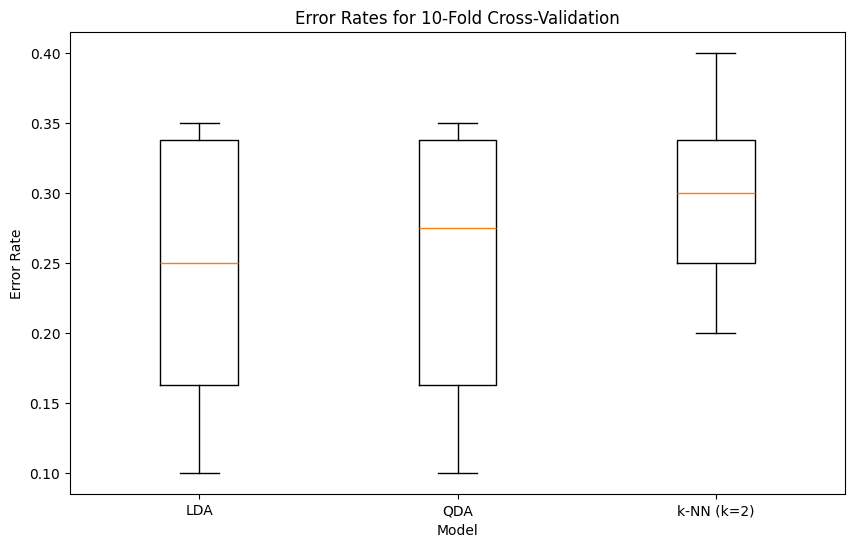

Mean cross-validation error rates:
LDA: 0.245
QDA: 0.250
k-NN (k=2): 0.300


In [ ]:
folds = np.array_split(X_train, 10)
target_folds = np.array_split(y_train_encoded, 10)

#lists to store cross-validation error rates
lda_errors, qda_errors, knn_errors = [], [], []

for i in range(10):
    #i-th fold for validation
    X_val, y_val = folds[i], target_folds[i]

    X_train_cv = pd.concat([fold for j, fold in enumerate(folds) if j != i])
    y_train_cv = np.concatenate([fold for j, fold in enumerate(target_folds) if j != i])

    #models
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    knn = KNeighborsClassifier(n_neighbors=2)

    #LDA
    lda.fit(X_train_cv, y_train_cv)
    y_pred_lda = lda.predict(X_val)
    lda_errors.append(1 - accuracy_score(y_val, y_pred_lda))

    #QDA
    qda.fit(X_train_cv, y_train_cv)
    y_pred_qda = qda.predict(X_val)
    qda_errors.append(1 - accuracy_score(y_val, y_pred_qda))

    #k-NN (k=2)
    knn.fit(X_train_cv, y_train_cv)
    y_pred_knn = knn.predict(X_val)
    knn_errors.append(1 - accuracy_score(y_val, y_pred_knn))

#box plot
plt.figure(figsize=(10, 6))
plt.boxplot([lda_errors, qda_errors, knn_errors], labels=['LDA', 'QDA', 'k-NN (k=2)'])
plt.title("Error Rates for 10-Fold Cross-Validation")
plt.ylabel("Error Rate")
plt.xlabel("Model")
plt.show()

#mean crossval error
print("Mean cross-validation error rates:")
print(f"LDA: {np.mean(lda_errors):.3f}")
print(f"QDA: {np.mean(qda_errors):.3f}")
print(f"k-NN (k=2): {np.mean(knn_errors):.3f}")

### 2.3. Evaluation

Now, decide which method to choose and then train it on the entire data set `pima_tr` and predict `pima_te`. How well does it perform?

Finally, since we are in a simulated environment, we can cheat and break the rule that we were only allowed to look at the true output in `pima_te` once. That is, you can explore how well the other two methods do when you train them on `pima_tr` and predict `pima_te`. Did you make the "right" choice in the previous question?

Answer:

Based on the performance on the test data, we can conclude that we have made the right choice by selecting LDA in the previous question, as we can see its performace is clearly better than the other two models.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#train test LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_encoded)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test_encoded, y_pred_lda)

print("\nLDA Results:")
print(f"Accuracy: {accuracy_lda:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_lda))
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_lda))

# Train and evaluate QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train_encoded)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test_encoded, y_pred_qda)

print("\nQDA Results:")
print(f"Accuracy: {accuracy_qda:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_qda))
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_qda))

# Train and evaluate k-NN (k=2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train_encoded)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)

print("\nk-NN Results:")
print(f"Accuracy: {accuracy_knn:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_knn))



LDA Results:
Accuracy: 0.798
Confusion Matrix:
[[198  25]
 [ 42  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       223
           1       0.73      0.61      0.67       109

    accuracy                           0.80       332
   macro avg       0.78      0.75      0.76       332
weighted avg       0.79      0.80      0.79       332


QDA Results:
Accuracy: 0.771
Confusion Matrix:
[[194  29]
 [ 47  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       223
           1       0.68      0.57      0.62       109

    accuracy                           0.77       332
   macro avg       0.74      0.72      0.73       332
weighted avg       0.76      0.77      0.77       332


k-NN Results:
Accuracy: 0.720
Confusion Matrix:
[[207  16]
 [ 77  32]]
Classification Report:
              precision    recall  f1-score   support

        